In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

AttributeError: module 'tensorflow.core.framework.types_pb2' has no attribute 'SerializedDType'

In [4]:
batch_size = 50
epochs = 30
IMG_HEIGHT = 28
IMG_WIDTH = 28
TRAIN_PATH = 'shapes'
VAL_PATH = 'val_shapes'

In [6]:
train_data =  tf.keras.utils.image_dataset_from_directory(
    batch_size=batch_size,
    label_mode='int',
    directory=TRAIN_PATH,
    color_mode="grayscale",
    shuffle=True,
    image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 860 files belonging to 3 classes.


In [7]:
val_data =  tf.keras.utils.image_dataset_from_directory(
    batch_size=batch_size,
    label_mode='int',
    directory=VAL_PATH,
    shuffle=True,
    color_mode="grayscale",
    image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 252 files belonging to 3 classes.


In [8]:
class_names = train_data.class_names
print(class_names)

['0', '1', '2']


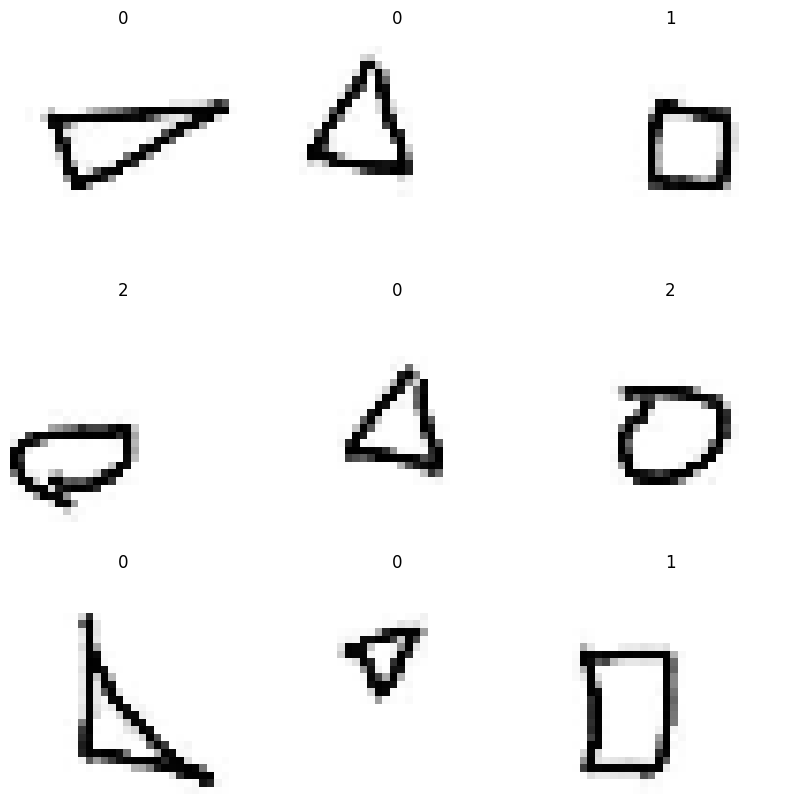

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #print(images[i].numpy().max())
    plt.imshow(images[i].numpy(),cmap='gray' )
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 30, 30, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
#Build the model
from tensorflow.keras import layers
model = Sequential([
    layers.Input(shape=(IMG_HEIGHT,IMG_WIDTH,1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation="softmax"),
])
# Compile the model
model.compile(optimizer='adam',              
              loss="sparse_categorical_crossentropy",              
              metrics=['accuracy'])
# print the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0

In [12]:
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

Epoch 1/200
27/27 [==============================] - 3s 70ms/step - loss: 19.4708 - accuracy: 0.3198 - val_loss: 1.2048 - val_accuracy: 0.3730
Epoch 2/200
27/27 [==============================] - 1s 20ms/step - loss: 1.1293 - accuracy: 0.3198 - val_loss: 1.1047 - val_accuracy: 0.3016
Epoch 3/200
27/27 [==============================] - 1s 23ms/step - loss: 1.1011 - accuracy: 0.3221 - val_loss: 1.1008 - val_accuracy: 0.3373
Epoch 4/200
27/27 [==============================] - 1s 20ms/step - loss: 1.0944 - accuracy: 0.3663 - val_loss: 1.1067 - val_accuracy: 0.2976
Epoch 5/200
27/27 [==============================] - 1s 23ms/step - loss: 1.0865 - accuracy: 0.3767 - val_loss: 1.1126 - val_accuracy: 0.3016
Epoch 6/200
27/27 [==============================] - 1s 22ms/step - loss: 1.0988 - accuracy: 0.3523 - val_loss: 1.1000 - val_accuracy: 0.3413
Epoch 7/200
27/27 [==============================] - 1s 23ms/step - loss: 1.0916 - accuracy: 0.3605 - val_loss: 1.1050 - val_accuracy: 0.2778
Epoch

1/1 [==============================] - 0s 159ms/step
[[1. 0. 0.]]


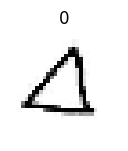

In [13]:
for images, labels in train_data.take(1):
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        #print(images[i].numpy().max())
        plt.imshow(images[i].numpy(),cmap='gray' )
        plt.title(class_names[labels[i]])
        plt.axis("off")
        print(np.round(model.predict(images[:1])))



In [14]:
#img_path = 'shapes/1/1681791001.jpg'
img_path = 'shapes/2/1681770064.jpg'
newimg = tf.keras.utils.load_img(
    path=img_path,
    color_mode='grayscale',
    target_size=(30,30),
    interpolation='nearest',
    keep_aspect_ratio=False
)
newimg


In [15]:
input_arr = tf.keras.utils.img_to_array(newimg)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(np.round(model.predict(input_arr)))

1/1 [==============================] - 0s 42ms/step
[[0. 0. 1.]]


In [16]:
model.save('shapes_v1')

INFO:tensorflow:Assets written to: shapes_v1\assets


INFO:tensorflow:Assets written to: shapes_v1\assets


In [17]:
from tensorflow import keras
model = keras.models.load_model('shapes_v1')